#                                   Multiple Linear Regression

### Combined Cycle Power Plant DataSet

--The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load.

##### Attribute Information
<ul>
Features consist of hourly average ambient variables
    
<li>Temperature (T) ->  1.81°C and 37.11°C,
<li>Ambient Pressure (AP) -> 992.89-1033.30 milibar,
<li>Relative Humidity (RH) -> 25.56% to 100.16%
<li>Exhaust Vacuum (V) -> 25.36-81.56 cm Hg
    
<li>Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization. </li>
</ul>

[DataSet Download Link](https://archive.ics.uci.edu/ml/machine-learning-databases/00294/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Part 1 - Data Preprocessing

In [2]:
df = pd.read_csv("../input/airpressure/Folds5x2_pp.csv")
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

df.info()  # to get the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


 There is no null value present in the data set

In [3]:
# checking the whole descriptive statistics summary of Data Frame. 
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


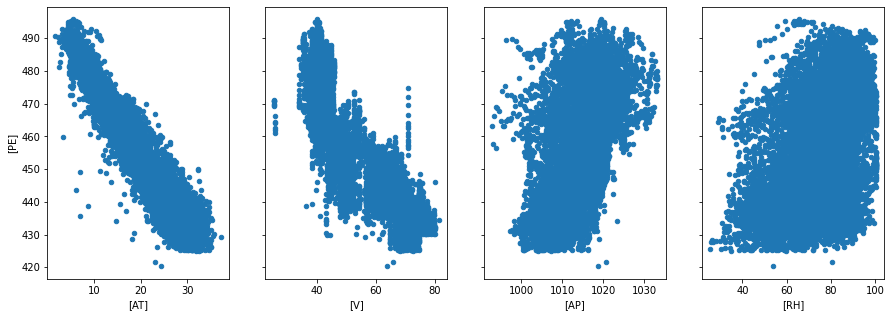

In [4]:
# Scatter Plot

# df.subplot(kind="scatter", x="AT", y="PE")
# df.subplot(kind="scatter", x="V", y="PE")
# df.subplot(kind="scatter", x="AP", y="PE")
# df.subplot(kind="scatter", x="RH", y="PE")


fig, axes = plt.subplots(1,len(df.columns.values)-1, sharey=True, figsize=(15, 5))

for i, col in enumerate(df.columns.values[:-1]):
    df.plot(x=[col], y=["PE"], kind="scatter", ax=axes[i])

plt.show()


#### Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split

# Splitting dataset into 80%, 20% 
# 80% for training & 20% for testing

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 4)

### Part 2 

In [6]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [7]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [8]:
y_predict = mlr.predict(x_test)

In [9]:
print("Coefficient: ",mlr.coef_)

Coefficient:  [-1.96570132 -0.24151324  0.05613097 -0.15742374]


## Visualising the Difference between predicted and actual test values

In [10]:
import seaborn as sns

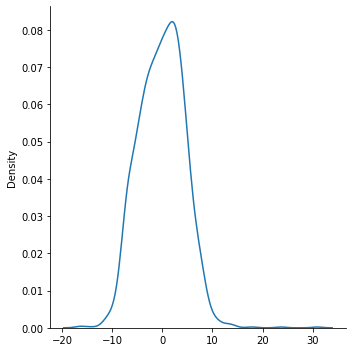

In [11]:
sns.displot(y_predict - y_test, kind ='kde')

Varience is good (between -10 to 10)

Text(0, 0.5, 'Predicted')

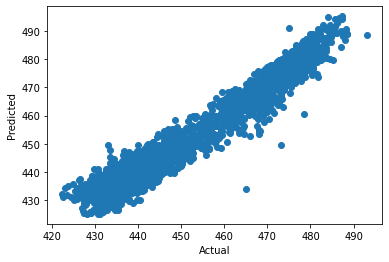

In [12]:

plt.scatter(y_predict,y_test)
# plt.plot(y_predict, y_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<AxesSubplot:>

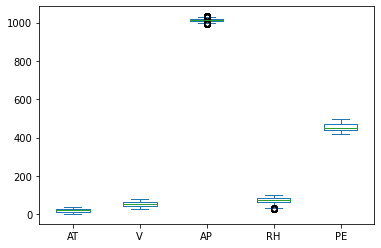

In [13]:
# Box Plot
df.plot(kind="box")

In [14]:
from sklearn.metrics import r2_score

In [15]:
score = r2_score(y_predict, y_test)

In [16]:
score

0.9257302405560971


### Difference between Predicted and Actual Value

In [17]:
secDF = pd.DataFrame(data={'Actual': y_test, 'Predicted': y_predict, 'Difference': y_test - y_predict})

In [18]:
secDF.to_csv("predict_diff.csv")

In [19]:
secDF.head()

,Actual,Predicted,Difference
0,488.99,480.253795,8.736205
1,477.50,473.002303,4.497697
2,448.04,447.200802,0.839198
3,472.50,469.401859,3.098141
4,475.51,473.861379,1.648621


## Mean Square Error

$MSE = \frac{1}{n} \sum \limits _{i=1} ^{n} (Y_{i} - \hat{Y}_{i} )^2$


$\mathrm{MSE}	=	mean\ squared\ error$<br>
${n}	=	number\ of\ data\ points $<br>
$Y_{i}	=	observed\ values$<br>
$\hat{Y}_{i}	=	predicted\ values$<br>


In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mean_squared_error(y_test, y_predict, squared=False)
# squred is true if RMSE

4.508753564190385